In [1]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt; 
import pandas as pd
plt.rcdefaults()
%matplotlib inline

import PIL
import glob
import scikitplot as skplt

In [2]:
X_input = []
input_names = ["Band 1", "Band 2", "Band 3", "Band 4", "Band 6", "MRH", "MSH", "MTE", "MVI"]
X_names = np.asarray(input_names)

Y_output = []

In [3]:
folder = "../satyam_rad_sat_mod_npy/"
Sa1_files = glob.glob("../satyam_rad_sat_mod_npy/sa1_npy/*")
Sa1_files

['../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030620.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010216.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030920.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010218.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030919.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010219.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031318.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010220.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031319.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012116.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031320.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012118.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032716.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012120.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032718.npy',
 '../satyam_rad_sat_mod_npy/sa1

In [4]:
len(Sa1_files)

349

In [5]:
for filename in Sa1_files:
    filename = filename.split('/')[-1]
    
    # Satellite 1
    Sa_1_File = folder + "sa1_npy/" + filename;
    Sa1arr = np.load(Sa_1_File).flatten()
    
    
    # Satellite 2
    Sa_2_File = folder + "sa2_npy/" + filename;
    Sa2arr = np.load(Sa_2_File).flatten()
    
    
    # Satellite 3
    Sa_3_File = folder + "sa3_npy/" + filename;
    Sa3arr = np.load(Sa_3_File).flatten()
    
    # Satellite 4
    Sa_4_File = folder + "sa4_npy/" + filename;
    Sa4arr = np.load(Sa_4_File).flatten()
    
    # Satellite 6
    Sa_6_File = folder + "sa6_npy/" + filename;
    Sa6arr = np.load(Sa_6_File).flatten()
    
    
    
    # MRH
    MRH_File = folder + "mrh_npy/" + filename.replace('sat', "mod", 1)
    MRHarr = np.load(MRH_File).flatten()
    
    # MSH
    MSH_File = folder + "msh_npy/" + filename.replace('sat', "mod", 1)
    MSHarr = np.load(MSH_File).flatten()
    
    # MTE
    MTE_File = folder + "tem_npy/" + filename.replace('sat', "mod", 1)
    MTEarr = np.load(MTE_File).flatten()
    
    # MVI
    MVI_File = folder + "vis_npy/" + filename.replace('sat', "mod", 1)
    MVIarr = np.load(MVI_File).flatten()
    

    
    # Radar
    Radar_File = folder + "rad_npy/" + filename.replace('sat', "rad", 1)
    Radararr = np.load(Radar_File).flatten()
    
    
    
    for i in range(len(Sa1arr)):
        x = [];
        x.append(Sa1arr[i])
        x.append(Sa2arr[i])
        x.append(Sa3arr[i])
        x.append(Sa4arr[i])
        x.append(Sa6arr[i])
        
        x.append(MRHarr[i])
        x.append(MSHarr[i])
        x.append(MTEarr[i])
        x.append(MVIarr[i])
        
        Y_output.append(Radararr[i])
        
        X_input.append(x)

In [6]:
X_input = np.array(X_input)
Y_output = np.array(Y_output)

In [7]:
print(X_input.shape)
print(np.std(X_input))
print(np.min(X_input))
print(np.mean(X_input))
print(np.max(X_input))

(22872064, 9)
7935.9956
-6427.248
8050.404
30993.518


In [8]:
print(Y_output.shape)
print(np.std(Y_output))
print(np.min(Y_output))
print(np.mean(Y_output))
print(np.max(Y_output))

(22872064,)
20.273754068168778
0
20.161293095367345
953


In [9]:
Y_output_no_zero = list(filter(lambda a: a != 0, Y_output))
print(np.shape(Y_output_no_zero))
print(np.std(Y_output_no_zero))
print(np.min(Y_output_no_zero))
print(np.mean(Y_output_no_zero))
print(np.max(Y_output_no_zero))

(22674932,)
20.273971376030666
1
20.336571946500214
953


In [10]:
thershold = np.mean(Y_output_no_zero) + 2 * np.std(Y_output_no_zero)
thershold

60.884514698561546

# Feature Importance

In [11]:
rf = RandomForestRegressor()
rf.fit(X_input, Y_output)

/home/wproj/.conda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [12]:
for feat, score in zip(X_names, rf.feature_importances_):
    print('{}       {}'.format(feat, score))

Band 1       0.06974614946126363
Band 2       0.06948961603421565
Band 3       0.09005635736999876
Band 4       0.04431781306181666
Band 6       0.06202678746360898
MRH       0.18504042827688164
MSH       0.15824356459658667
MTE       0.15431698079778838
MVI       0.1667623029378396


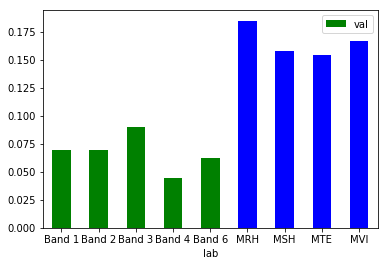

In [13]:
df = pd.DataFrame({'lab':input_names, 'val':rf.feature_importances_})
df.plot(kind = 'bar' , x='lab', y='val', rot=0, color=('g', 'g', 'g', 'g', 'g','b', 'b', 'b', 'b'))
plt.show()

# Test Train Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_input, Y_output, test_size=0.30, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16010444, 9)
(6861620, 9)
(16010444,)
(6861620,)


In [16]:
rf_train = RandomForestRegressor()
rf_train.fit(X_train, y_train)

/home/wproj/.conda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Save the trained model

In [17]:
import pickle
filename = 'MODEL_70_Random_Forest_1x1_npy.sav'
pickle.dump(rf_train, open(filename, 'wb'))

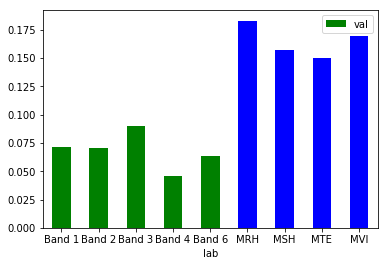

In [18]:
df = pd.DataFrame({'lab':input_names, 'val':rf_train.feature_importances_})
df.plot(kind = 'bar' , x='lab', y='val', rot=0, color=('g', 'g', 'g', 'g', 'g','b', 'b', 'b', 'b'))
plt.show()

In [19]:
predictions_train = rf_train.predict(X_train)

In [20]:
predictions_train.shape

(16010444,)

In [21]:
errors_train = abs(predictions_train - y_train)

In [22]:
np.mean(errors_train)

1.2396705654550664

In [23]:
np.max(errors_train)

424.3

(array([0.74425338, 0.1005162 , 0.05451946, 0.03112852, 0.01961017,
        0.01215277, 0.00921014, 0.00617843, 0.00478432, 0.00375136,
        0.00287849, 0.0023203 , 0.00192012, 0.00160462, 0.00134431,
        0.00115779, 0.0009984 , 0.00084788, 0.00082333]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

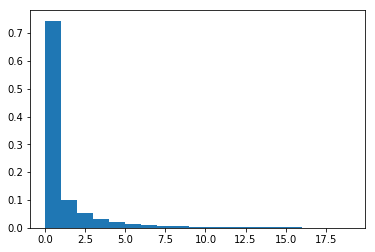

In [24]:
plt.hist(errors_train, bins=range(0, 20, 1), density=1)

### Confusion Matrix

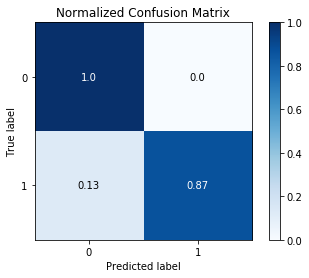

In [25]:
y_train_copy = np.copy(y_train)
y_train_copy[y_train_copy < thershold] = 0
y_train_copy[y_train_copy >= thershold] = 1

predictions_train_copy = np.copy(predictions_train)
predictions_train_copy[predictions_train_copy < thershold] = 0
predictions_train_copy[predictions_train_copy >= thershold] = 1

skplt.metrics.plot_confusion_matrix(y_train_copy, predictions_train_copy, normalize=True)
plt.show()

# Evaluation on Test

In [26]:
predictions_test = rf_train.predict(X_test)
predictions_test.shape

(6861620,)

In [27]:
y_test.shape

(6861620,)

In [28]:
errors_test = abs(predictions_test - y_test)

In [29]:
print(errors_test.shape)
print(np.std(errors_test))
print(np.min(errors_test))
print(np.mean(errors_test))
print(np.max(errors_test))

(6861620,)
9.464954827157205
0.0
3.1304474890769236
706.6


(array([2.688148e+06, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([0.00000000e+00, 3.05213598e-02, 6.10427195e-02, ...,
        7.06538957e+02, 7.06569479e+02, 7.06600000e+02]),
 <a list of 23151 Patch objects>)

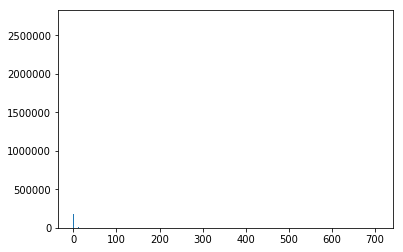

In [30]:
plt.hist(errors_test, bins='auto')

(array([6.357353e+06, 3.230410e+05, 8.649300e+04, 3.532600e+04,
        1.842600e+04, 1.121300e+04, 7.402000e+03, 5.046000e+03,
        3.610000e+03, 2.767000e+03, 2.140000e+03, 1.637000e+03]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120]),
 <a list of 12 Patch objects>)

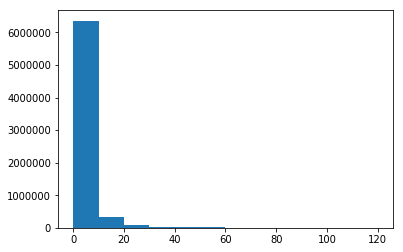

In [31]:
plt.hist(errors_test, bins=range(0, 130, 10))

In [32]:
np.sum(errors_test)

21479941.1

### Confusion Matrix

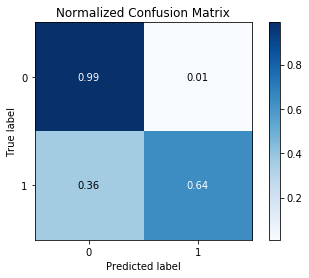

In [33]:
y_test_copy = np.copy(y_test)
y_test_copy[y_test_copy < thershold] = 0
y_test_copy[y_test_copy >= thershold] = 1

predictions_test_copy = np.copy(predictions_test)
predictions_test_copy[predictions_test_copy < thershold] = 0
predictions_test_copy[predictions_test_copy >= thershold] = 1

skplt.metrics.plot_confusion_matrix(y_test_copy, predictions_test_copy, normalize=True)
plt.show()

# k-FOLD  Train Test (k = 10)

In [34]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
kf.get_n_splits(X_input)
print(kf) 

KFold(n_splits=10, random_state=42, shuffle=True)


(20584857, 9)
(2287207, 9)
(20584857,)
(2287207,)


/home/wproj/.conda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


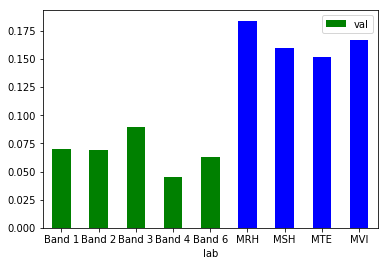

Sum : 6602272.400000008
Distribution


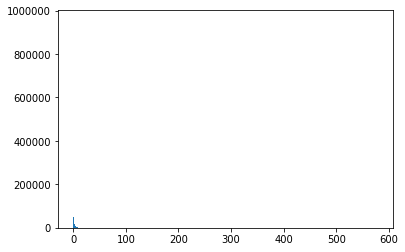

Confusion Matrix


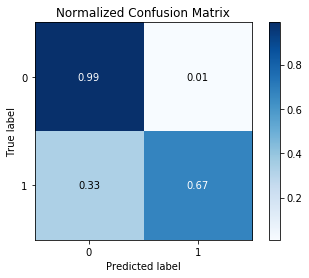



(20584857, 9)
(2287207, 9)
(20584857,)
(2287207,)


/home/wproj/.conda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


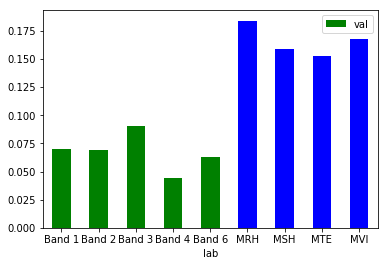

Sum : 6593339.8
Distribution


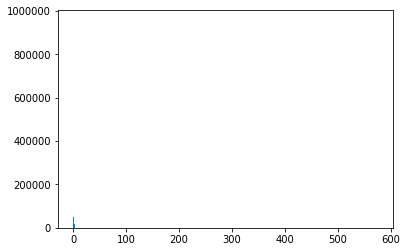

Confusion Matrix


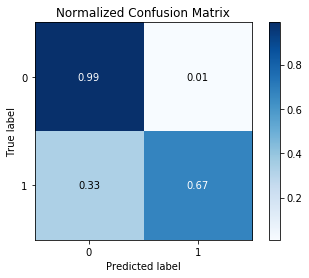



(20584857, 9)
(2287207, 9)
(20584857,)
(2287207,)


/home/wproj/.conda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


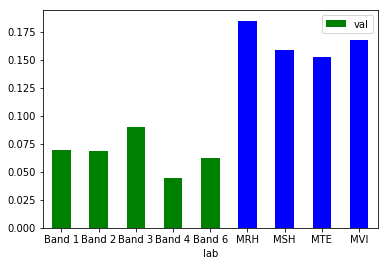

Sum : 6613255.466666664
Distribution


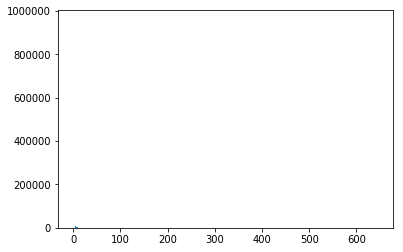

Confusion Matrix


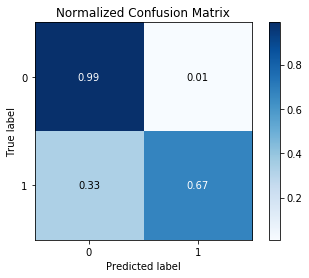



(20584857, 9)
(2287207, 9)
(20584857,)
(2287207,)


/home/wproj/.conda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


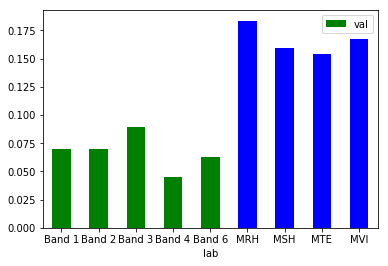

Sum : 6616824.316666666
Distribution


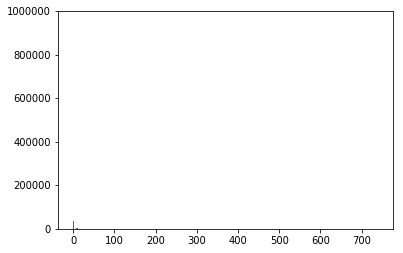

Confusion Matrix


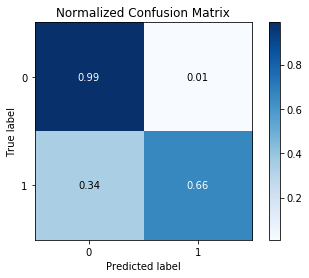



(20584858, 9)
(2287206, 9)
(20584858,)
(2287206,)


/home/wproj/.conda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


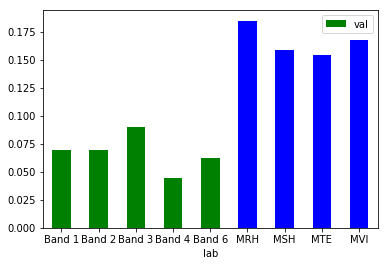

Sum : 6597063.983333329
Distribution


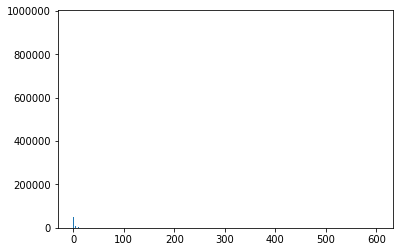

Confusion Matrix


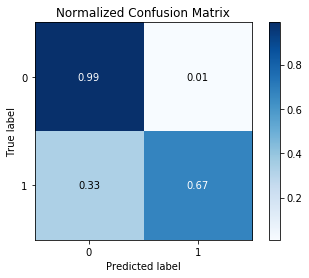



(20584858, 9)
(2287206, 9)
(20584858,)
(2287206,)


/home/wproj/.conda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


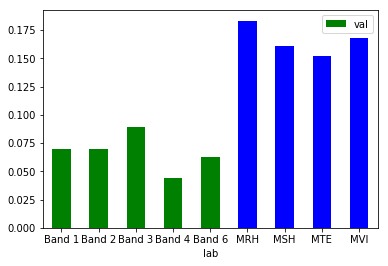

Sum : 6597033.5
Distribution


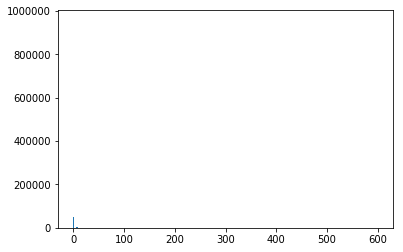

Confusion Matrix


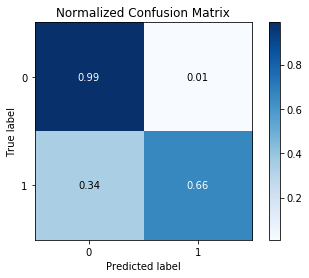



(20584858, 9)
(2287206, 9)
(20584858,)
(2287206,)


/home/wproj/.conda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


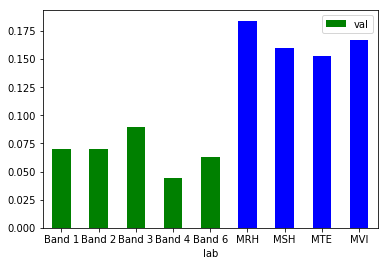

Sum : 6590828.700000004
Distribution


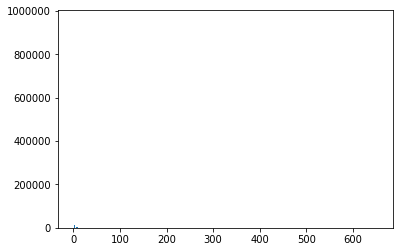

Confusion Matrix


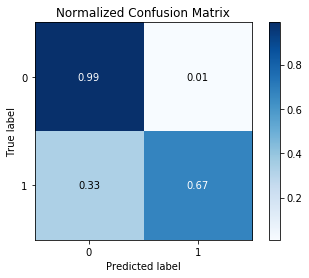



(20584858, 9)
(2287206, 9)
(20584858,)
(2287206,)


/home/wproj/.conda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


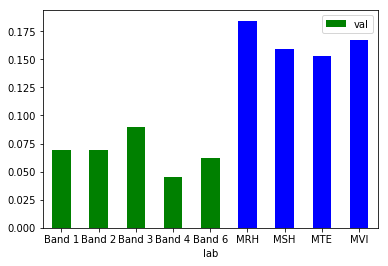

Sum : 6593656.899999999
Distribution


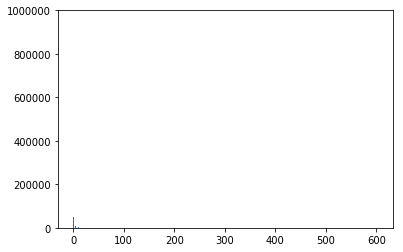

Confusion Matrix


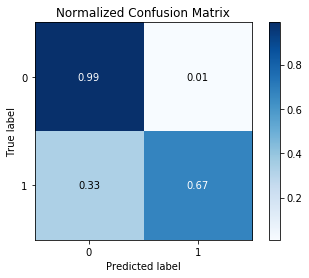



(20584858, 9)
(2287206, 9)
(20584858,)
(2287206,)


/home/wproj/.conda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


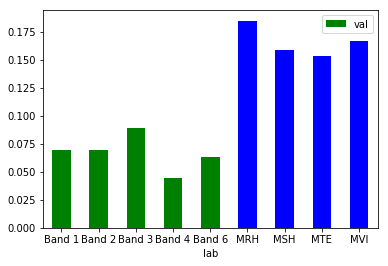

Sum : 6609723.26666667
Distribution


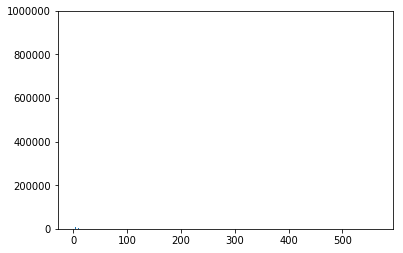

Confusion Matrix


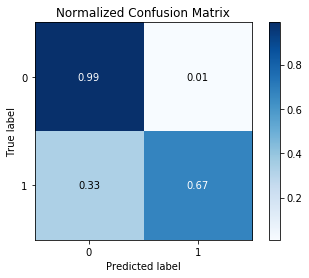



(20584858, 9)
(2287206, 9)
(20584858,)
(2287206,)


/home/wproj/.conda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


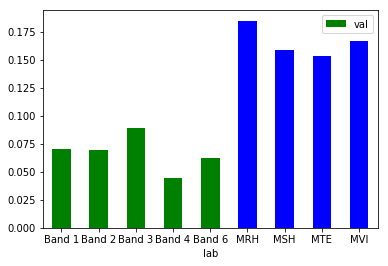

Sum : 6593622.900000001
Distribution


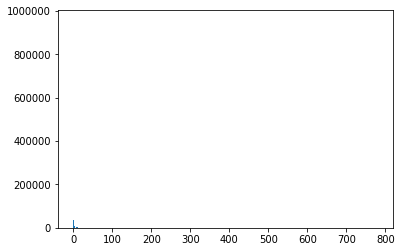

Confusion Matrix


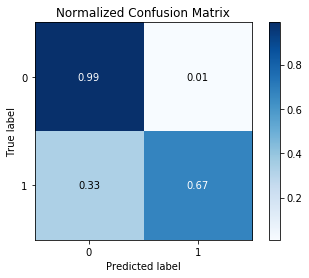

In [35]:
for train_index, test_index in kf.split(X_input):
    print("=====================================")
    X_train, X_test = X_input[train_index], X_input[test_index]
    y_train, y_test = Y_output[train_index], Y_output[test_index]
    
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    
    rf_train = RandomForestRegressor()
    rf_train.fit(X_train, y_train)
    
    df = pd.DataFrame({'lab':input_names, 'val':rf_train.feature_importances_})
    df.plot(kind = 'bar' , x='lab', y='val', rot=0, color=('g', 'g', 'g', 'g', 'g','b', 'b', 'b', 'b'))
    plt.show()
    
    predictions_test = rf_train.predict(X_test)
    
    errors_test = abs(predictions_test - y_test)
    print("Sum :", np.sum(errors_test))
    print("Distribution")
    plt.hist(errors_test, bins='auto')
    plt.show()
    
    y_test_copy = np.copy(y_test)
    y_test_copy[y_test_copy < thershold] = 0
    y_test_copy[y_test_copy >= thershold] = 1

    predictions_test_copy = np.copy(predictions_test)
    predictions_test_copy[predictions_test_copy < thershold] = 0
    predictions_test_copy[predictions_test_copy >= thershold] = 1
    
    print("Confusion Matrix")
    skplt.metrics.plot_confusion_matrix(y_test_copy, predictions_test_copy, normalize=True)
    plt.show()

    print("\n")

    
    